# Datasets
During the campaigns several datasets have been collected. The overview below shows the datasets available via the intake catalog for each research flight.

In [1]:
%matplotlib inline
import ac3airborne
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.style.use("mplstyle/book")

# load intake catalog and flight segments
cat = ac3airborne.get_intake_catalog()
meta = ac3airborne.get_flight_segments()

ancillary = ['AMSR2_SIC']


def data_availability(mission, platform):
    """
    Plot data availability matrix
    """
    
    # store data availability in a matrix
    data_availability = np.zeros(shape=(len(list(cat[mission][platform])),
                                        len(list(meta[mission][platform]))))
    for i, dataset in enumerate(list(cat[mission][platform])):
        data_availability[i, :] = np.isin(list(meta[mission][platform]), 
                                          list(cat[mission][platform][dataset]))

    # plot data availability
    yscale = data_availability.shape[1]
    fig, ax = plt.subplots(1, 1, figsize=(10, 3+0.4*yscale))
    
    ax.pcolormesh(range(data_availability.shape[0]), 
                  range(data_availability.shape[1]), 
                  data_availability.T, 
                  shading='nearest',
                  vmin=0, 
                  vmax=1, 
                  cmap='RdYlGn', 
                  edgecolors='#eeeeee')

    ax.set_xticks(range(data_availability.shape[0]))
    ax.set_yticks(range(data_availability.shape[1]))

    xlabels = []
    for ds_name in list(cat[mission][platform]):
        if ds_name in ancillary:
            ds_name += '\n(ancillary)'
        xlabels.append(ds_name)

    ax.set_xticklabels(xlabels, rotation=90)
    y_labels = [flight_id+', '+flight['date'].strftime('%Y-%m-%d') 
                for flight_id, flight in meta[mission][platform].items()]
    ax.set_yticklabels(y_labels)

    ax.tick_params(labeltop=True)
    ax.invert_yaxis()

    available = mpatches.Patch(color='green', label='Data available')
    not_flown = mpatches.Patch(color='red', label='Data missing or\ninstrument failed')

    ax.legend(handles=[available, not_flown], ncol=1,
              bbox_to_anchor=(0, 1.01), loc='lower right')

    plt.show()

## HALO-AC3
### HALO

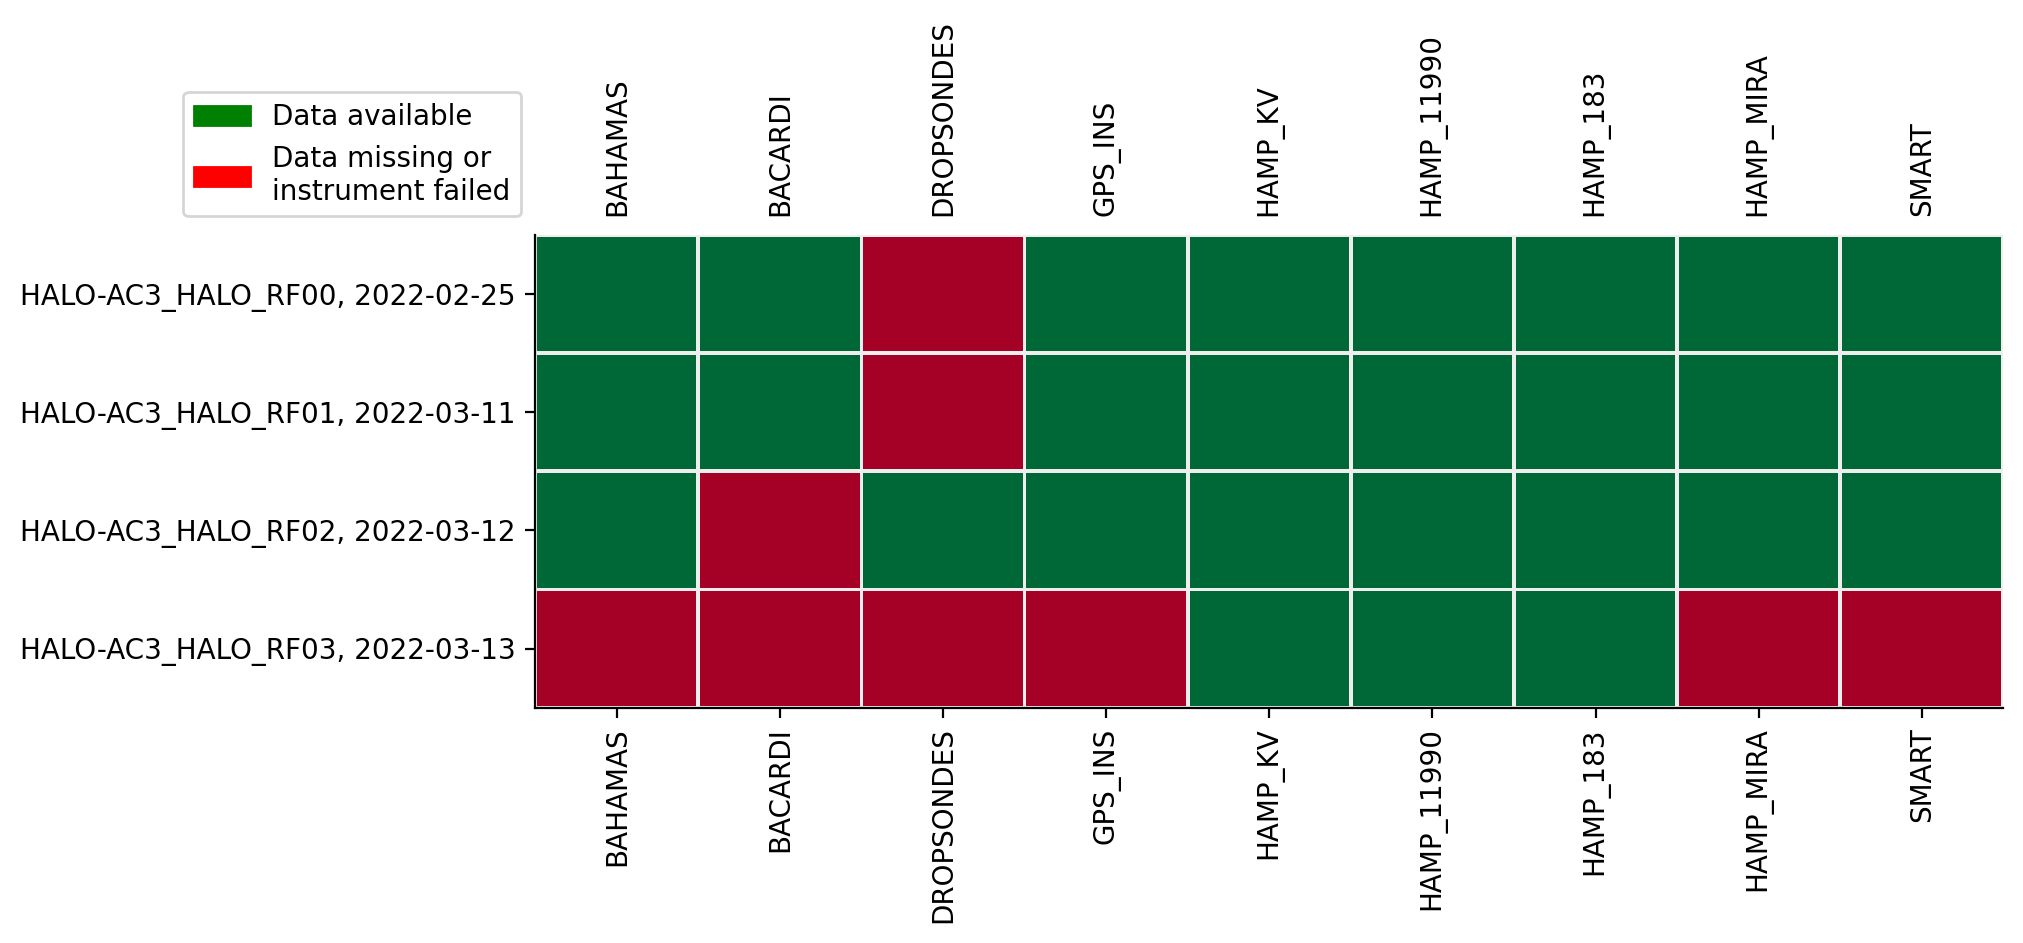

In [2]:
data_availability(mission='HALO-AC3', platform='HALO')

### P5

In [3]:
#data_availability(mission='HALO-AC3', platform='P5')

### P6

In [4]:
#data_availability(mission='HALO-AC3', platform='P6')

## ACLOUD
### P5

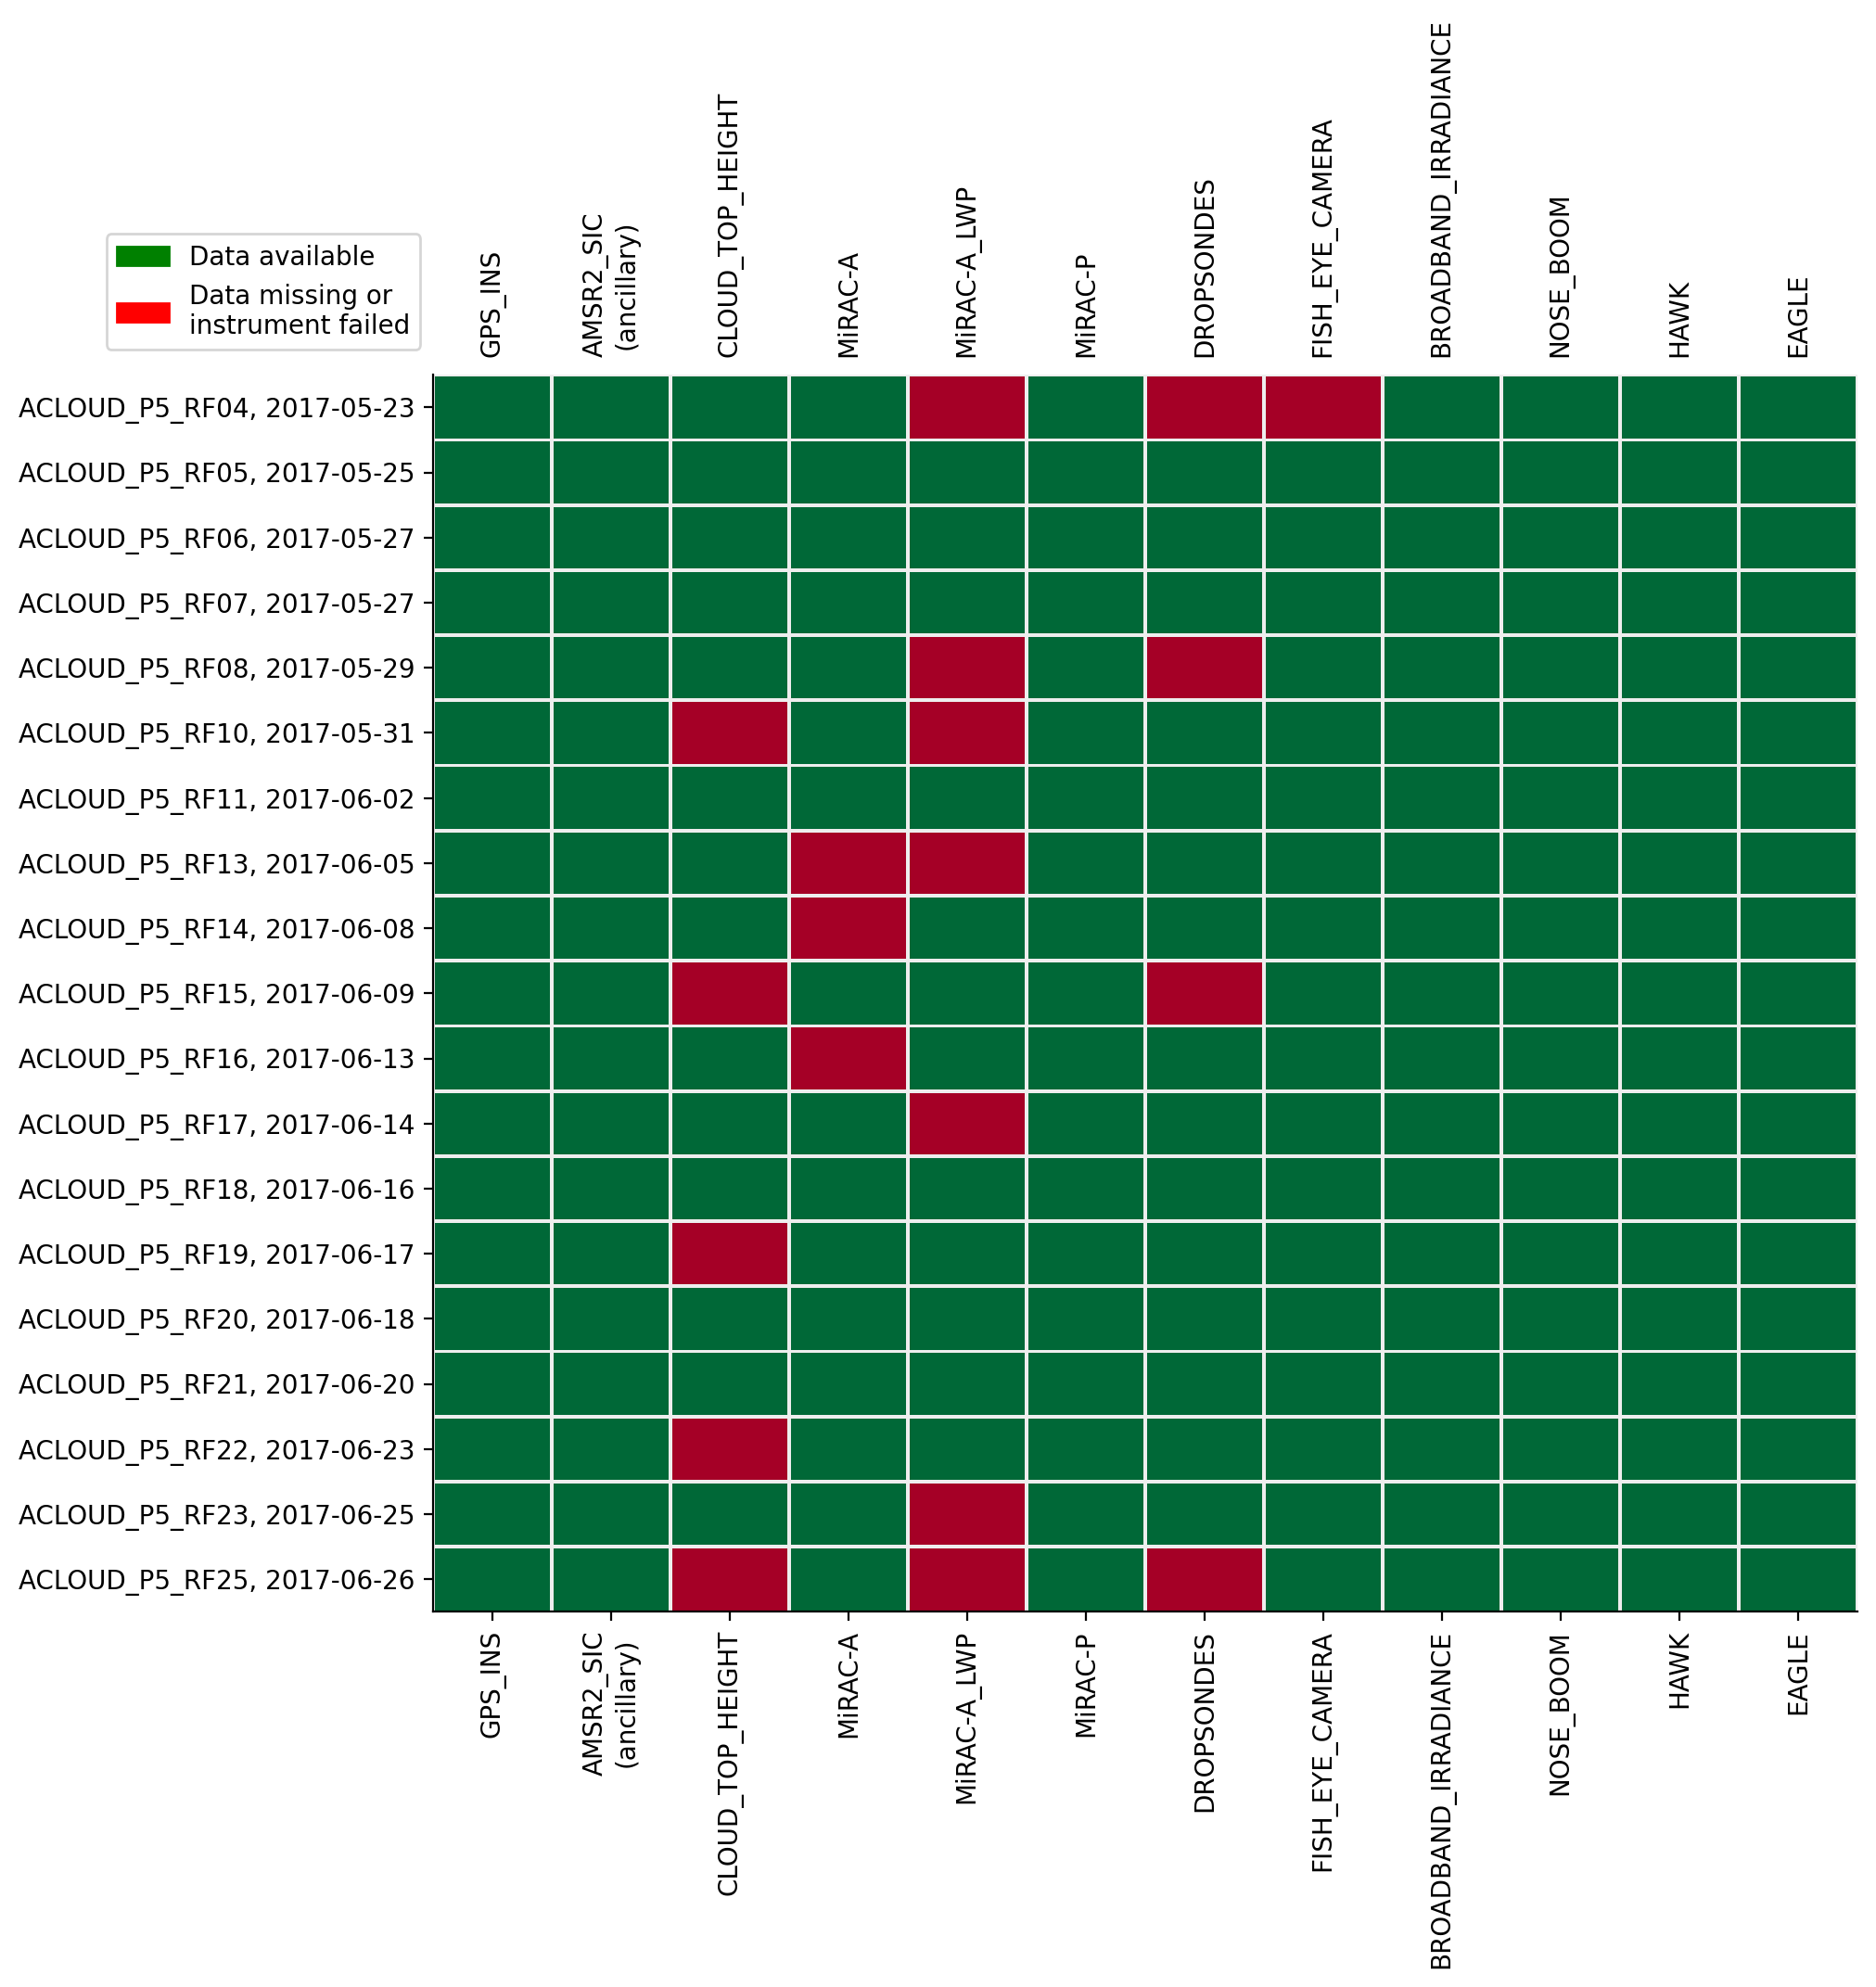

In [5]:
data_availability(mission='ACLOUD', platform='P5')

### P6

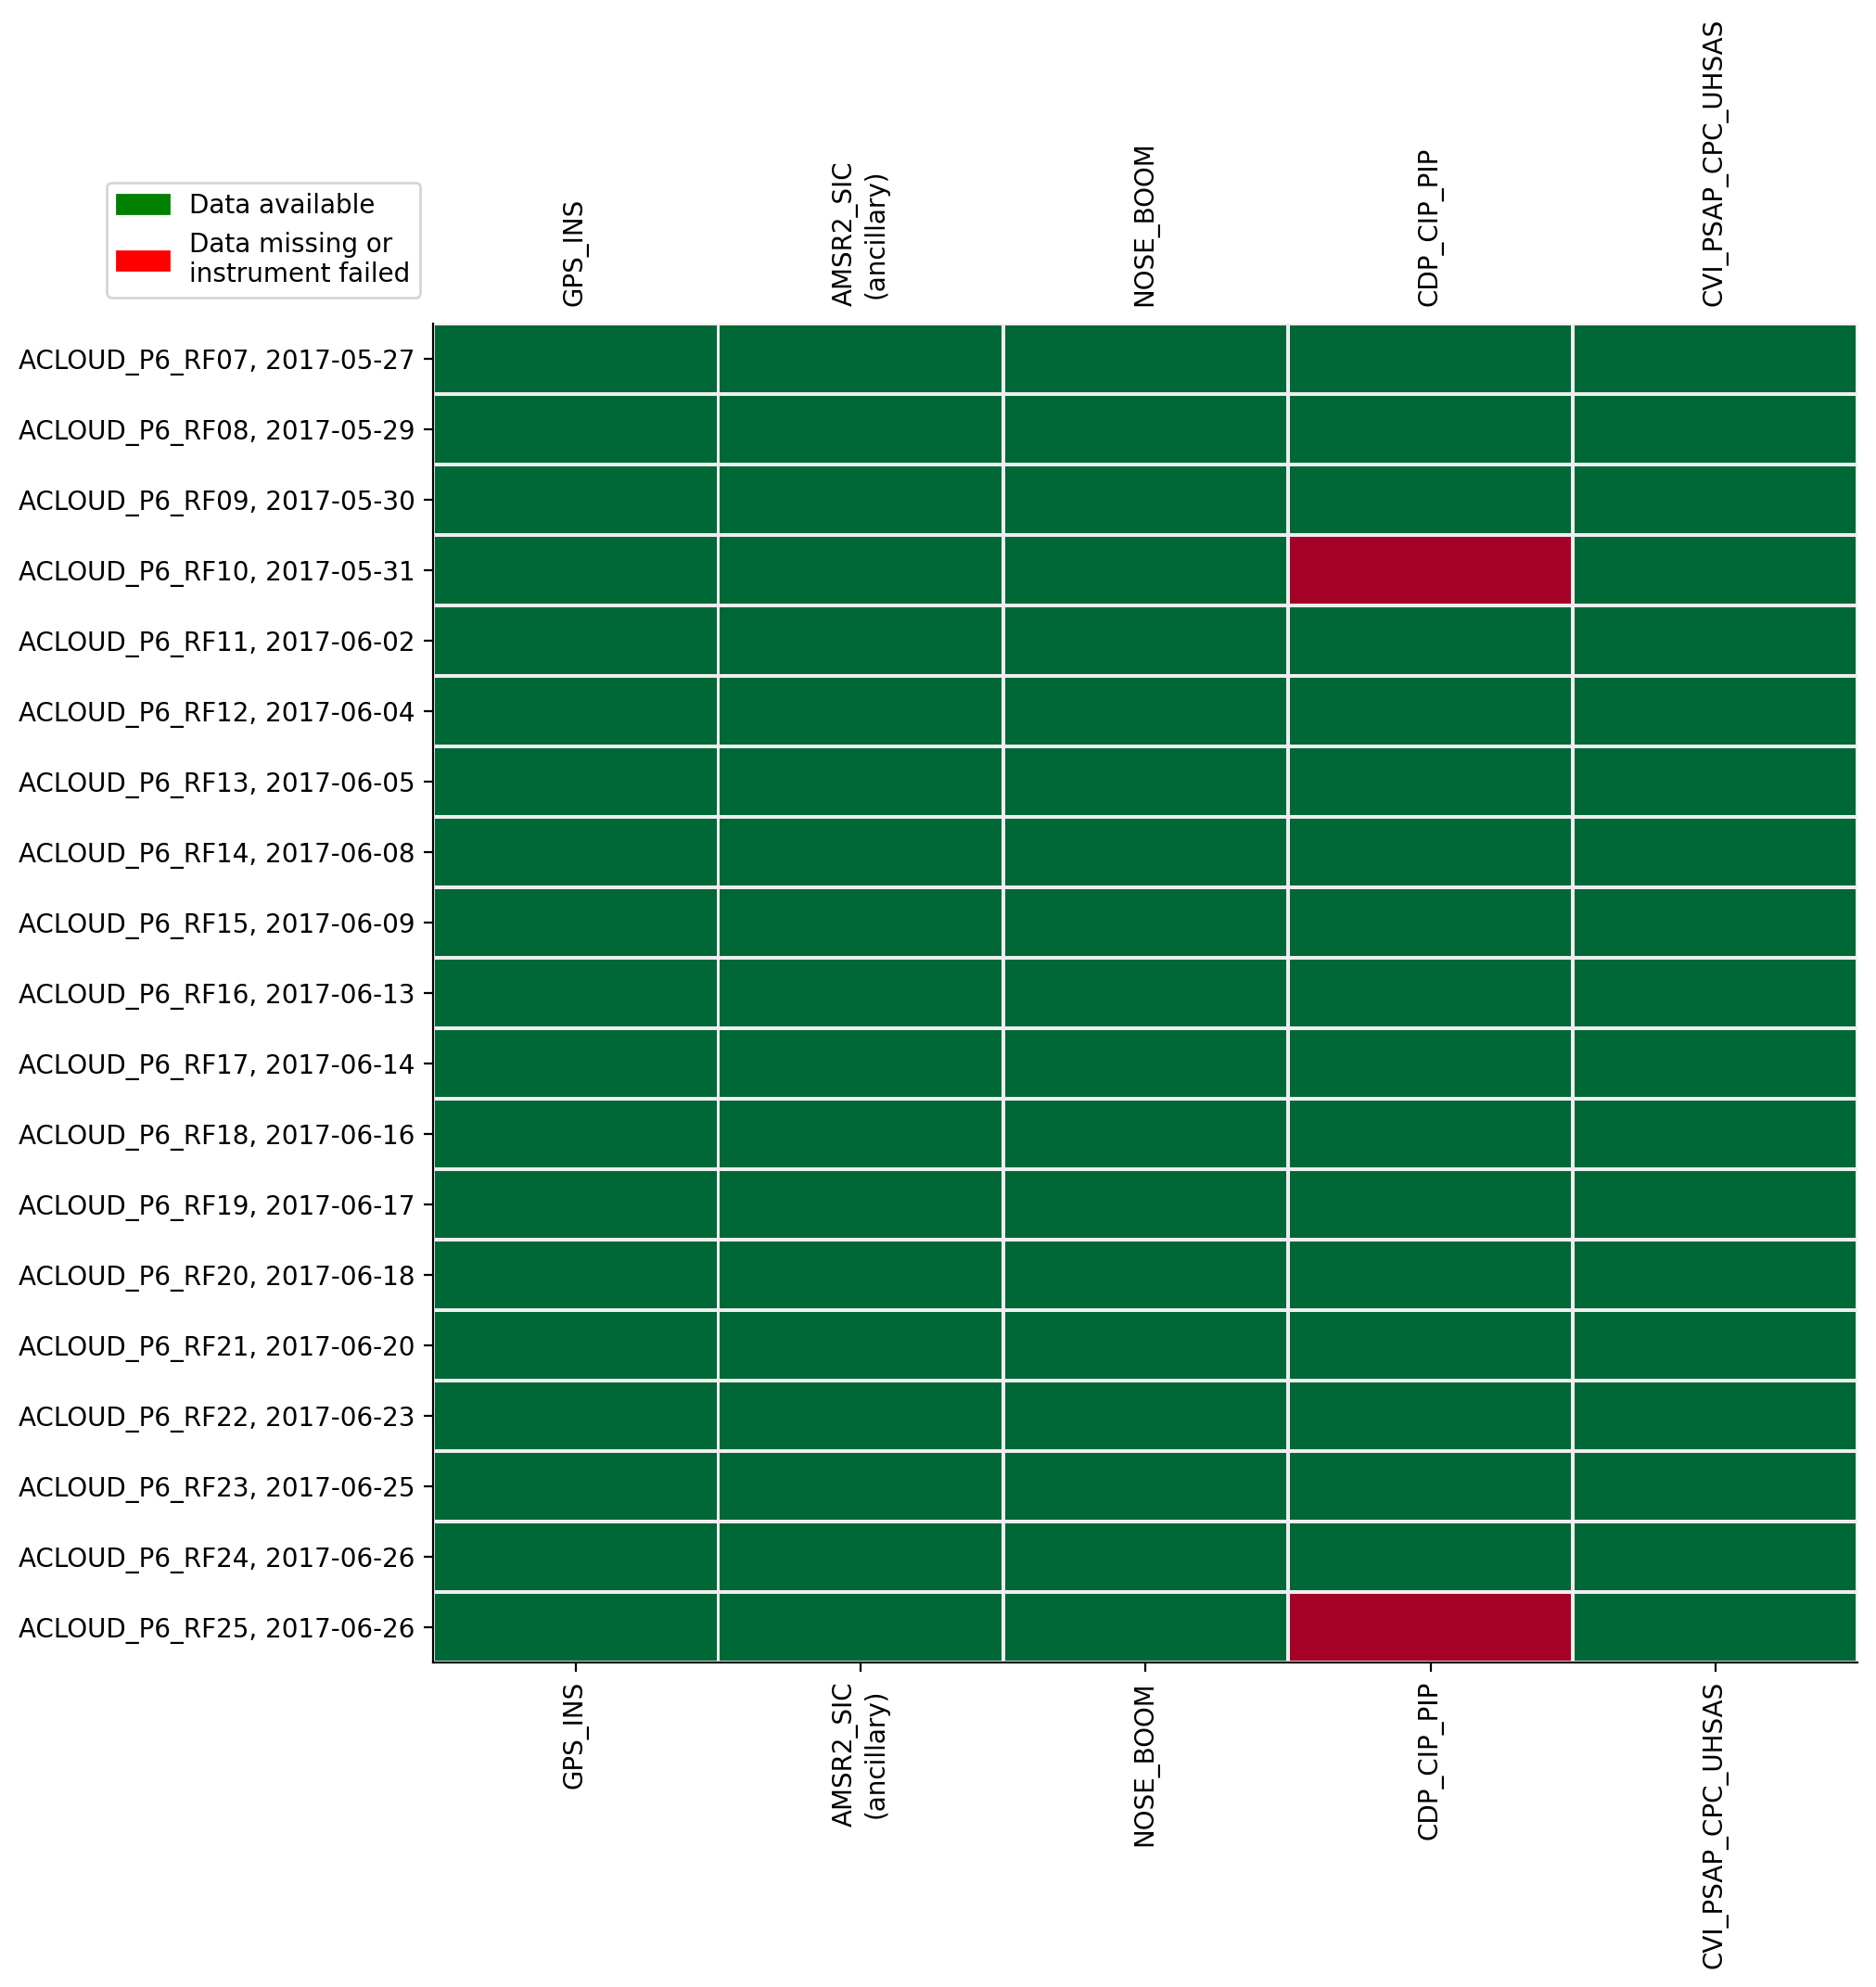

In [6]:
data_availability(mission='ACLOUD', platform='P6')

## AFLUX

### P5

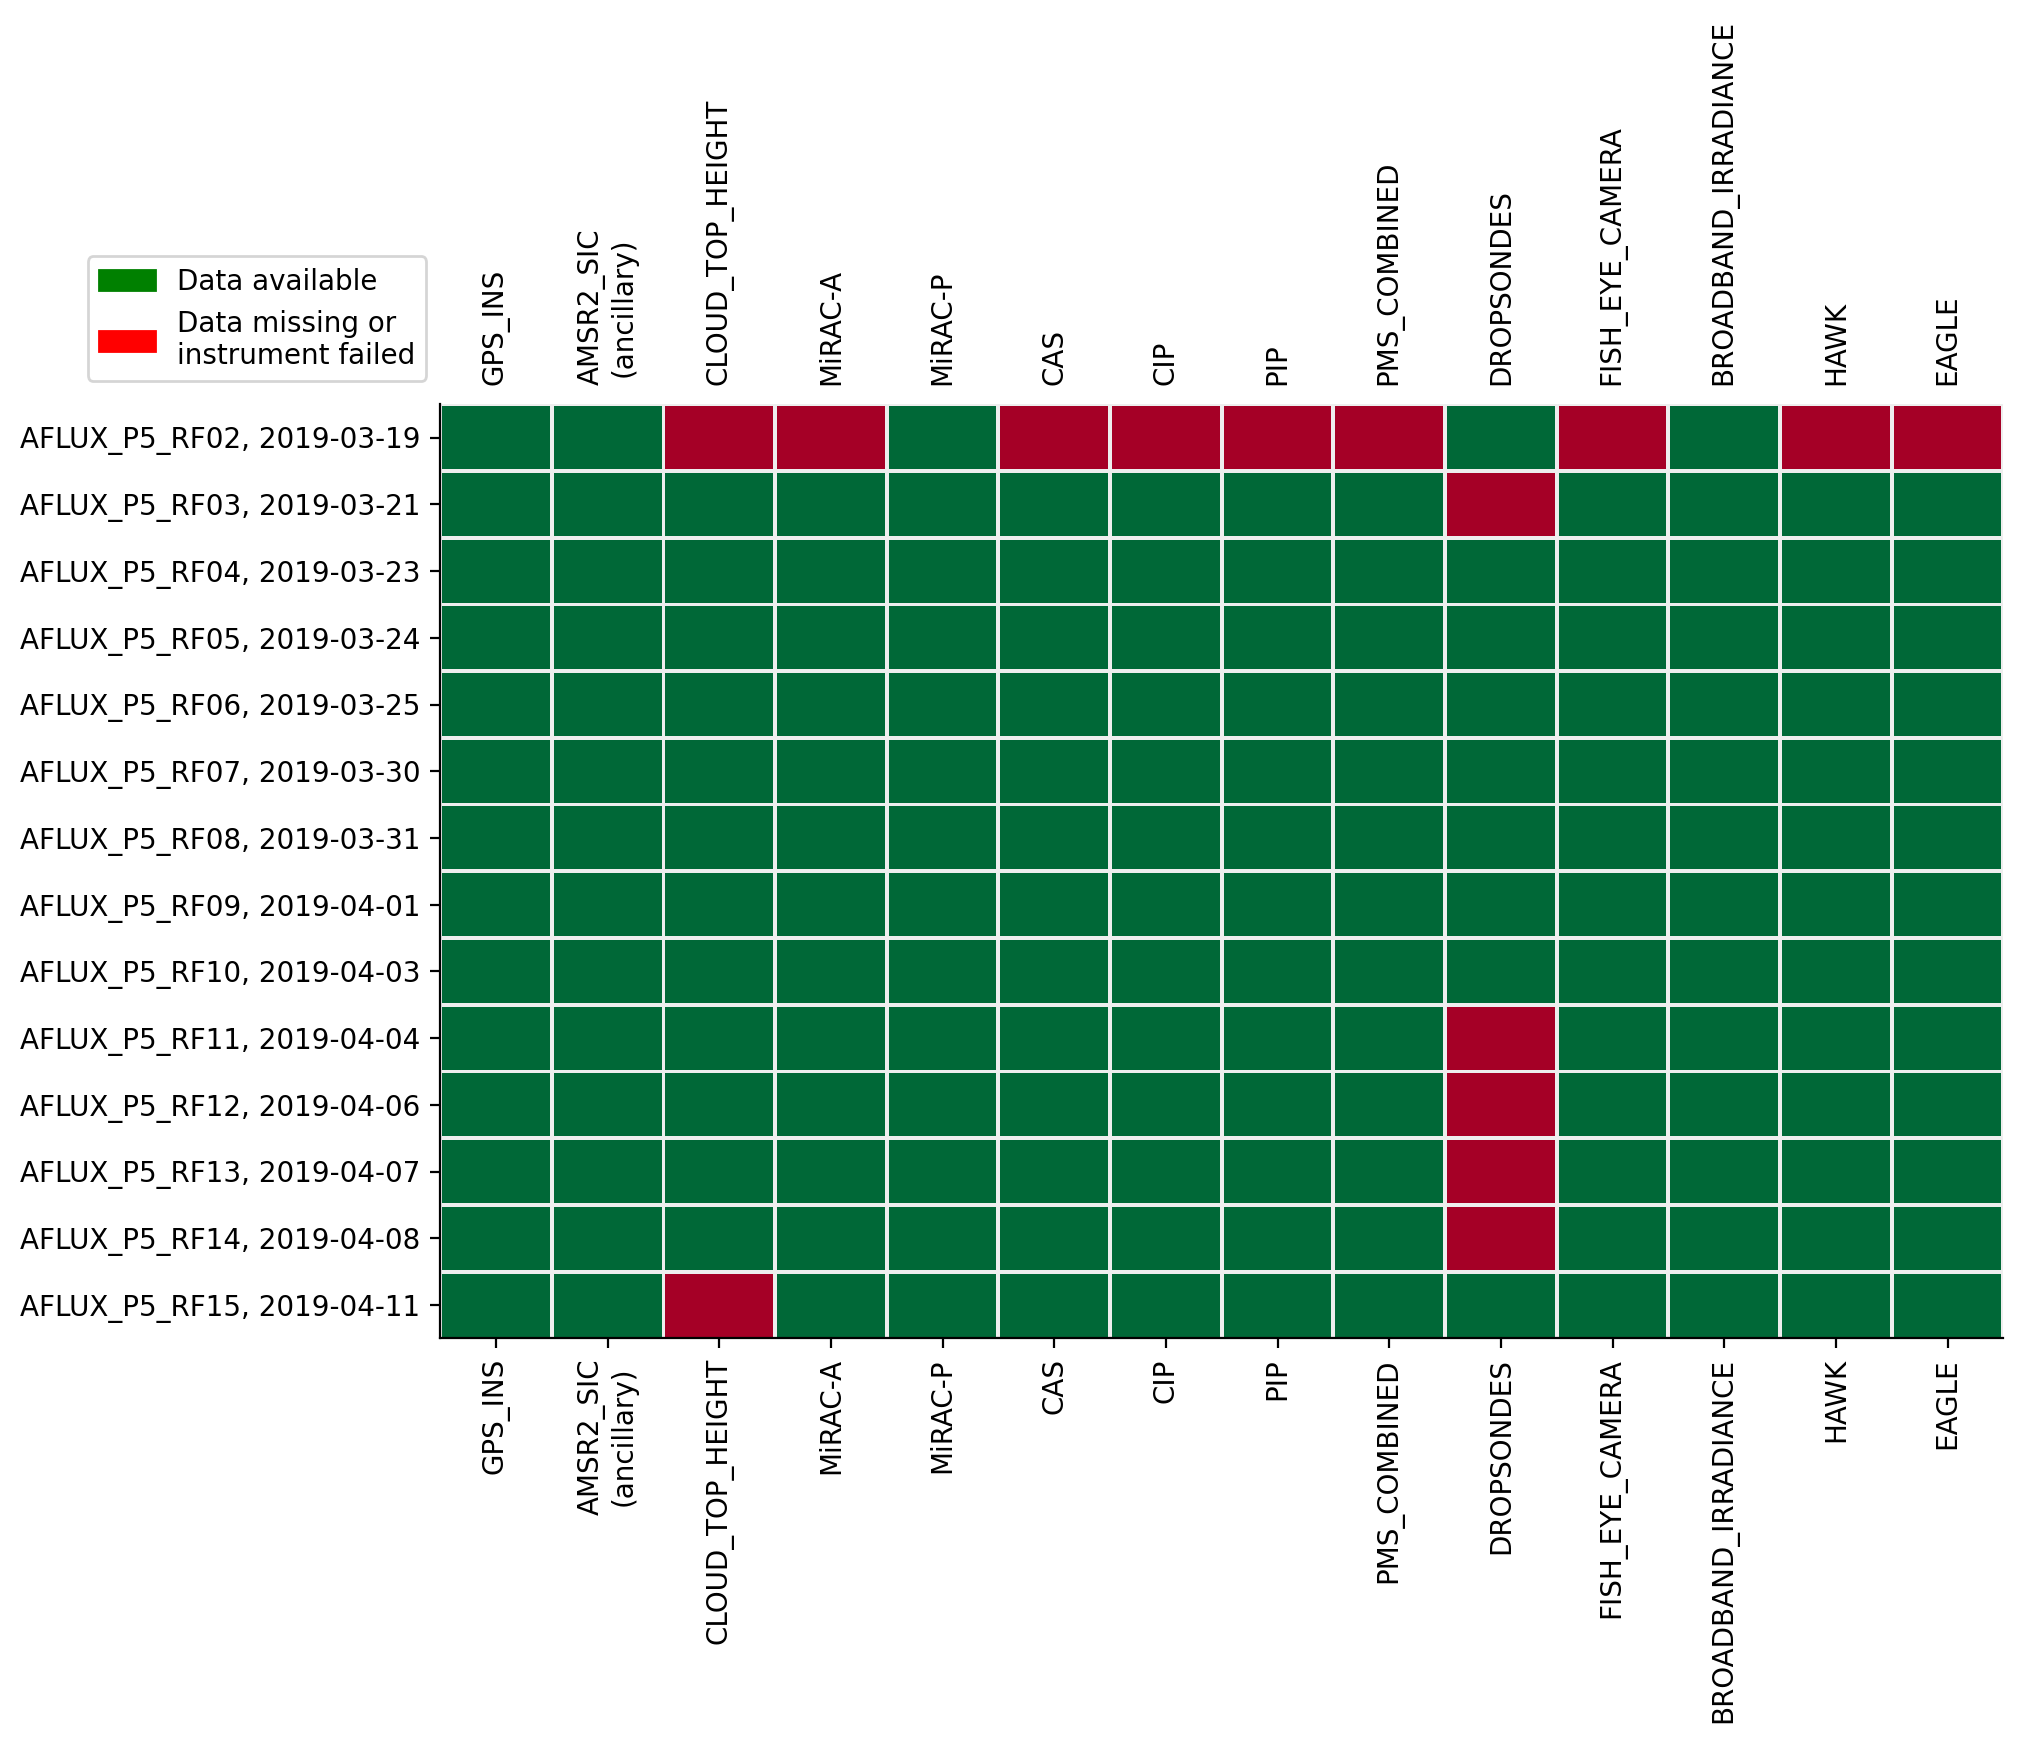

In [7]:
data_availability(mission='AFLUX', platform='P5')

## MOSAiC-ACA

### P5

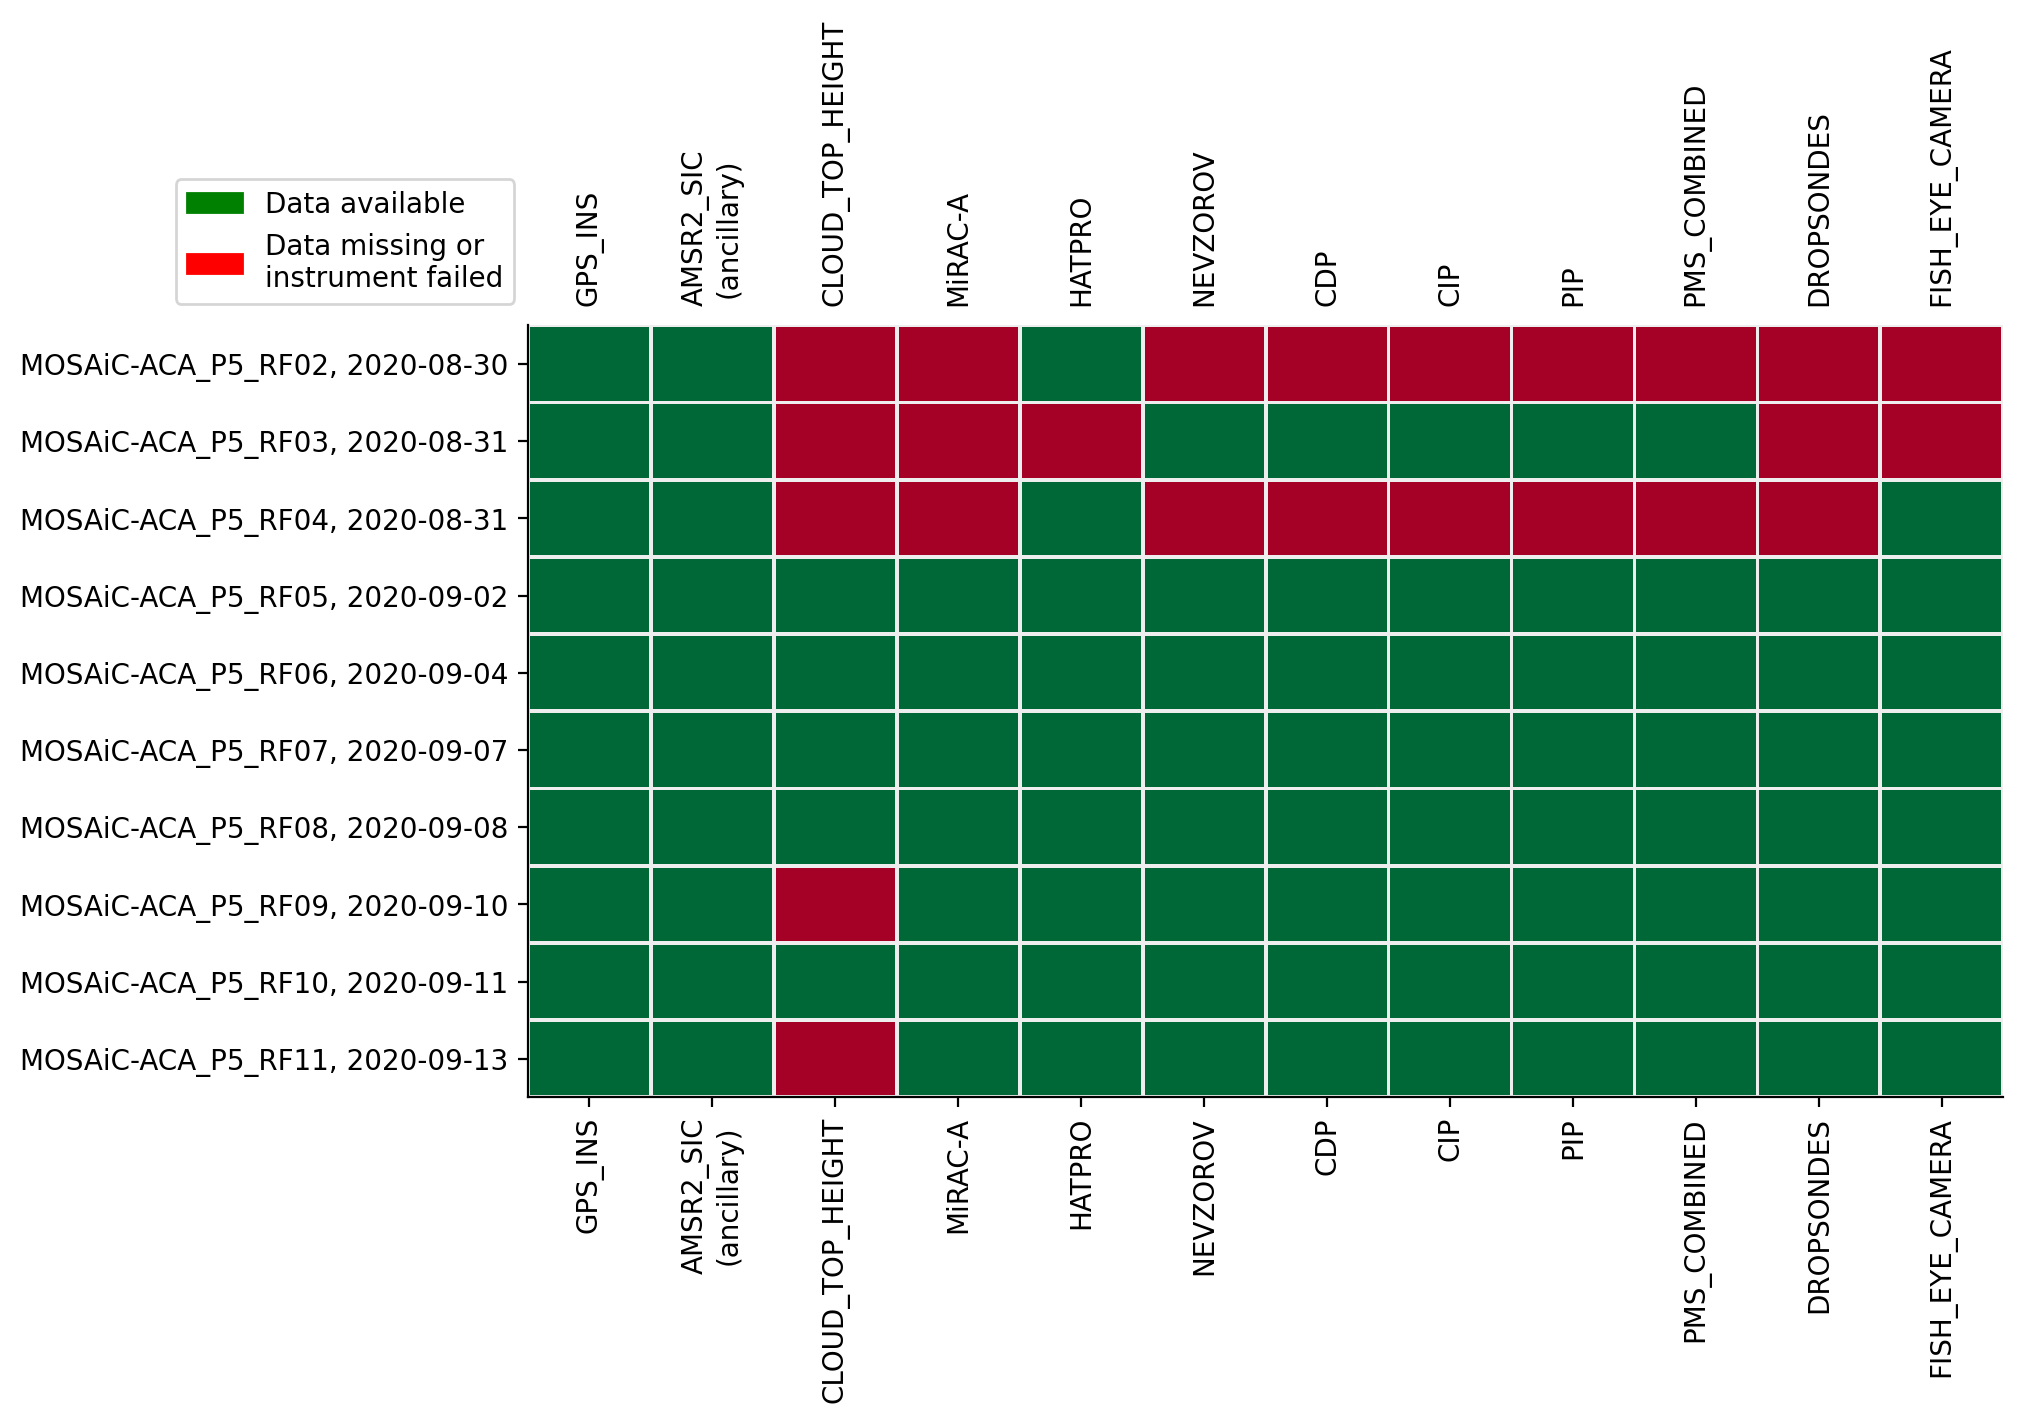

In [8]:
data_availability(mission='MOSAiC-ACA', platform='P5')

## PAMARCMiP

### P6

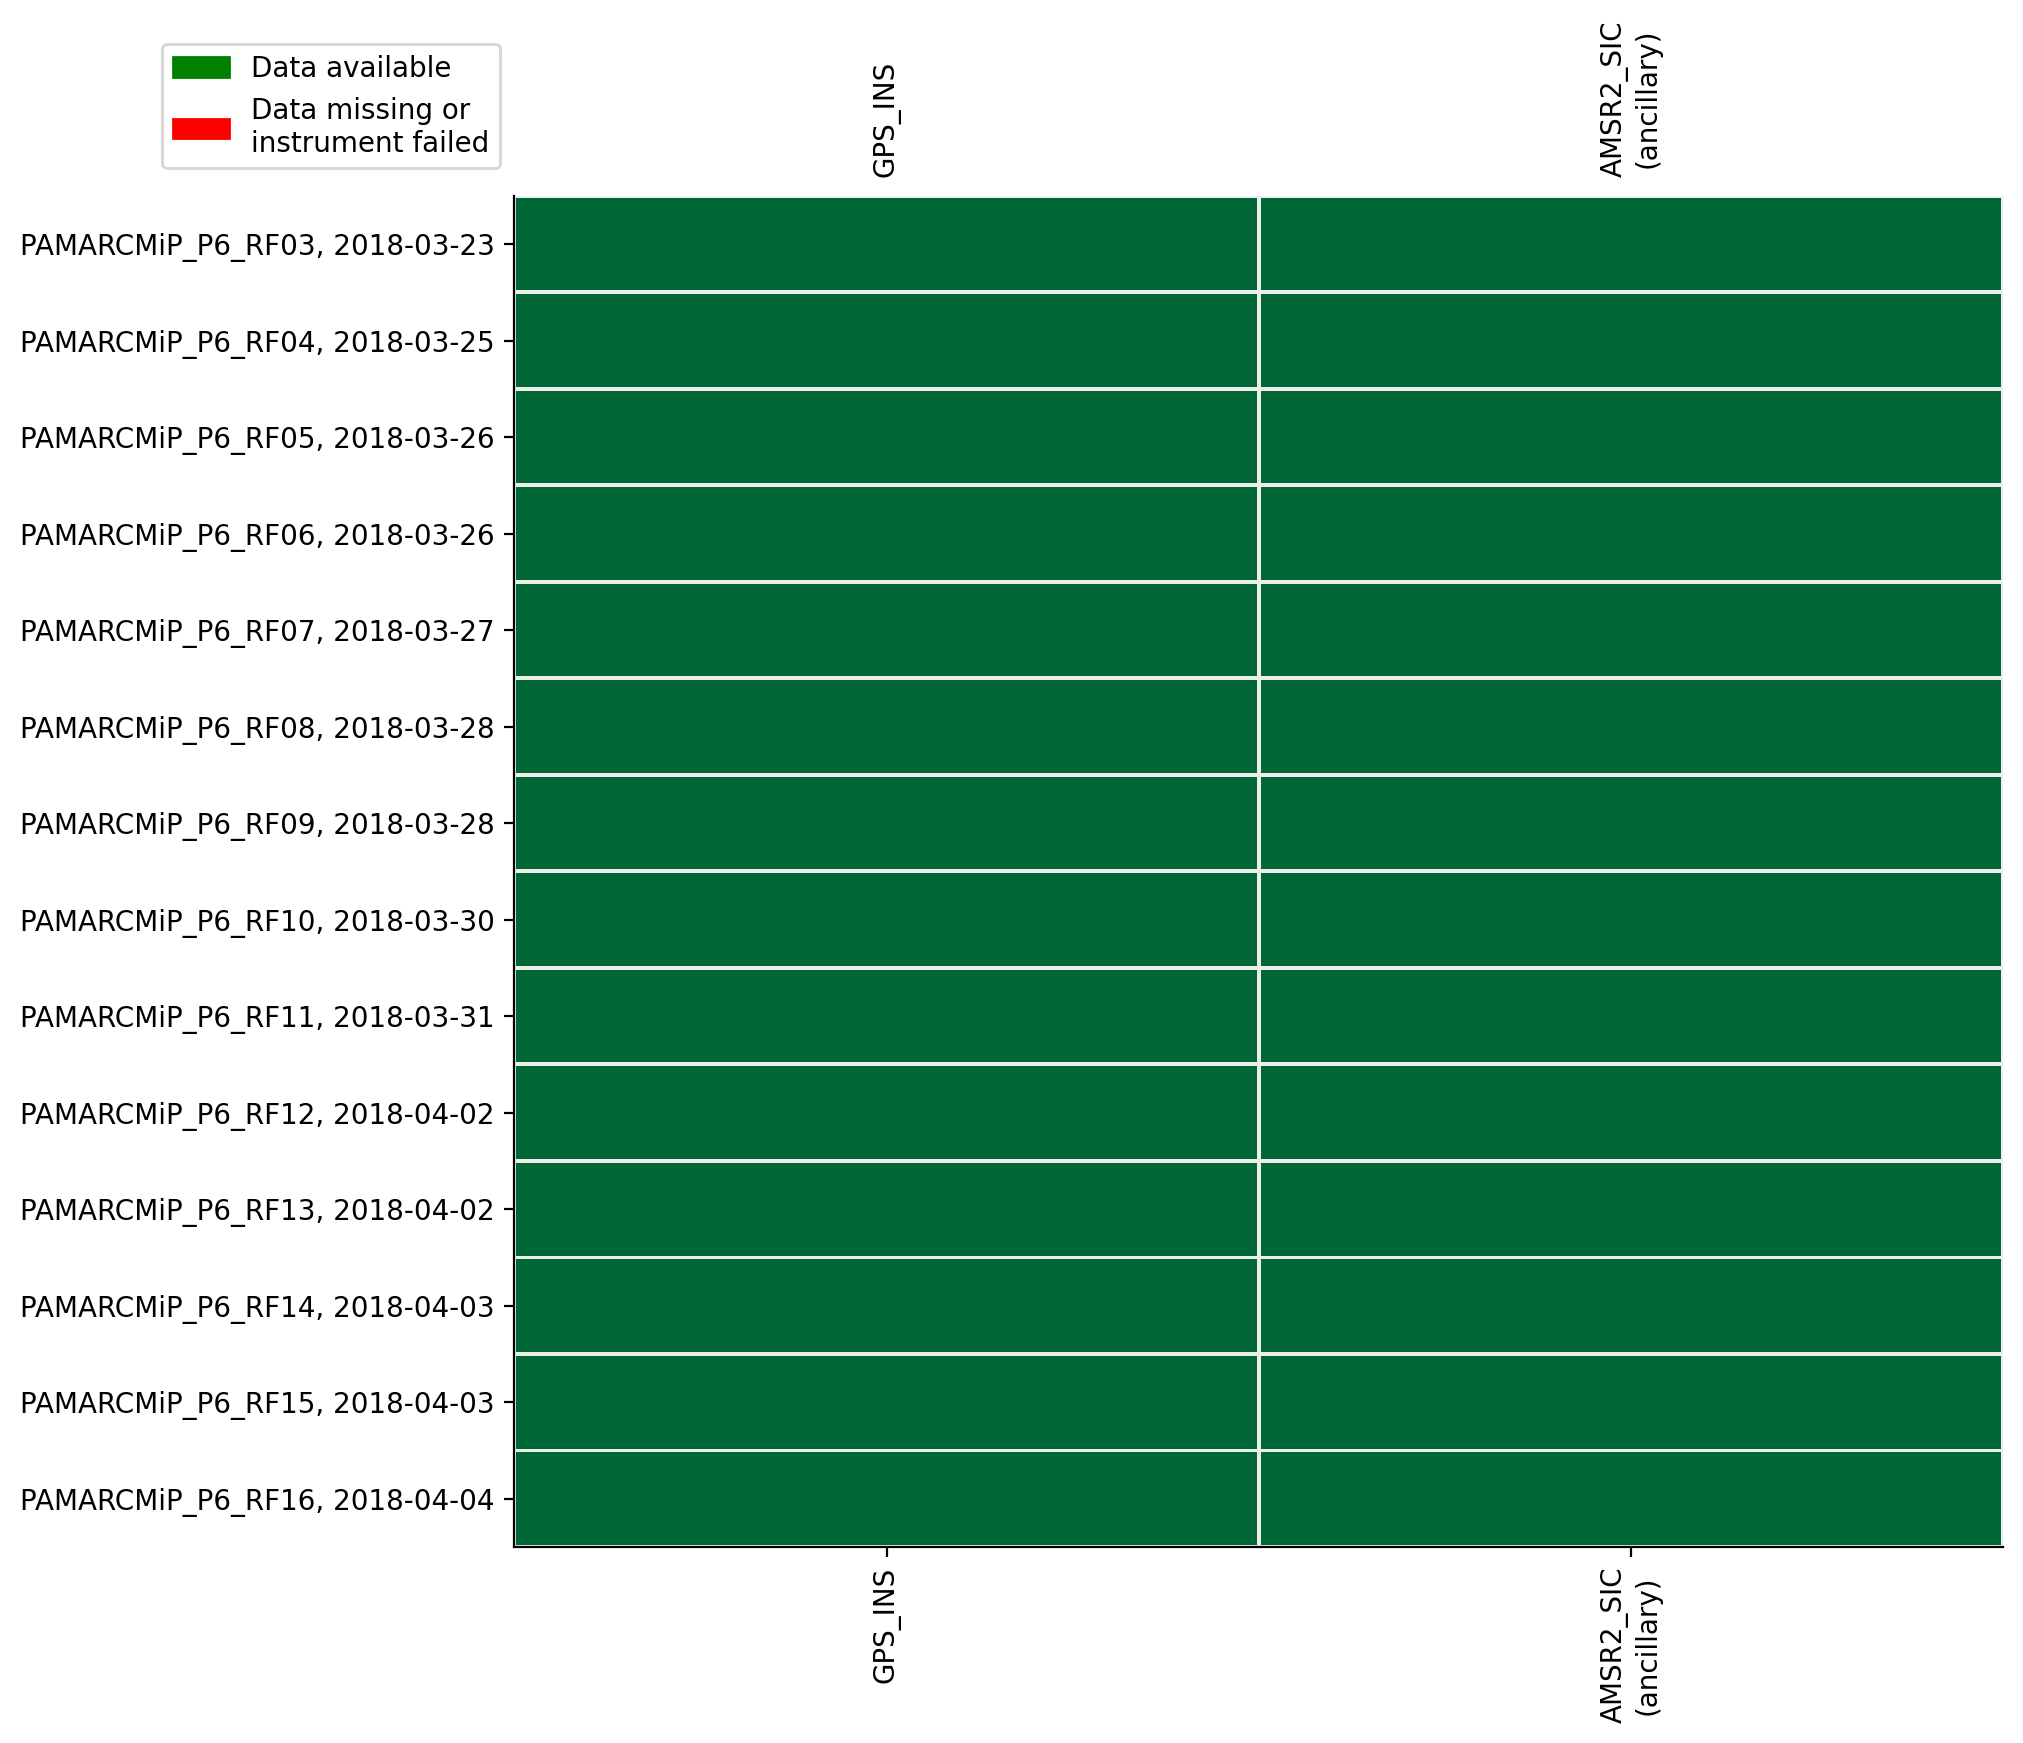

In [9]:
data_availability(mission='PAMARCMiP', platform='P6')